In [20]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

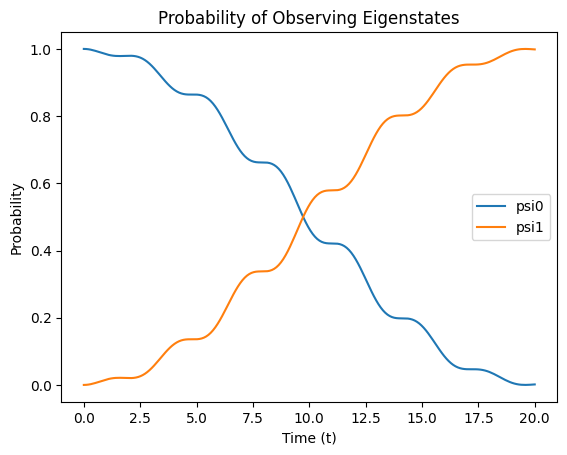

In [39]:
w0 = 1.0
wd = 1.0
phi = 0
tg = 20.0
theta = np.pi
V0 = theta / tg

sigz = qt.sigmaz()
sigx = qt.sigmax()

def drive(t, wd, V0, phi):
    return V0 * np.cos(wd*t + phi)

H0 = w0 / 2 * sigz
eigenvalues, eigenstates = H0.eigenstates()
H = [H0, [sigx, drive]]
psi0 = eigenstates[0]
psi1 = eigenstates[1]

tlist = np.linspace(0, tg, 200)
args = {"V0": V0, "wd": wd, "phi": phi}
psi_t0 = qt.sesolve(H, psi0, tlist, args=args)
psi_t1 = qt.sesolve(H, psi1, tlist, args=args)

probs0 = []
probs1 = []
for state in psi_t0.states:
    probs0.append(np.abs(psi0.dag() * state)**2)
    probs1.append(np.abs(psi1.dag() * state)**2)

plt.title("Probability of Observing Eigenstates")
plt.ylabel("Probability")
plt.xlabel("Time (t)")
plt.plot(tlist, probs0, label="psi0")
plt.plot(tlist, probs1, label="psi1")
plt.legend()
plt.show()

In [ ]:
U_target = sigx
U_sim = psi_t0.states[-1] * psi0.dag() + psi_t1.states[-1] * psi1.dag()
print(psi_t0.states[-1])
print(psi_t1.states[-1])

def qubit_fidelity(U_target, U_sim):
    t0 = psi0.dag() * U_target.dag() * U_sim * psi0
    t1 = psi1.dag() * U_target.dag() * U_sim * psi1
    trace =  t0 + t1
    return (np.abs(trace)**2 + 2) / 6

print(qubit_fidelity(U_target, U_sim))

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-0.54548785-0.83724261j]
 [-0.03770667+0.00678388j]]
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-0.03770667-0.00678388j]
 [ 0.54548785-0.83724261j]]
4.46946758913137e-16
0.8006501298323805
